# Perkenalan

## Latar Belakang

Cuaca merupakan faktor yang sangat dinamis dan dapat berubah-ubah dengan cepat. Kemampuan untuk memprediksi cuaca dengan akurat memiliki dampak yang signifikan pada berbagai sektor, termasuk pertanian, transportasi, energi, dan keamanan. Oleh karena itu, penelitian dalam pengembangan model prediksi cuaca yang efektif menjadi sangat penting. <br/>


Dalam konteks prediksi cuaca, kita sering dihadapkan pada tugas klasifikasi biner, yaitu memprediksi apakah suatu hari akan hujan atau tidak. Ini adalah masalah penting karena memungkinkan pihak-pihak terkait untuk mengambil langkah-langkah yang sesuai, seperti persiapan untuk cuaca buruk atau pengelolaan sumber daya air.<br/>


Salah satu pendekatan umum yang biasanya digunakan untuk metode klasifikasi adalah Logistic Regression dan Support Vector Machine. Metode tersebut mampu memberikan hasil prediksi yang baik terutama dalam konteks prediksi cuaca. Logistic Regression memberikan interpretasi probabilitas yang mudah dimengerti, sedangkan SVM dapat menangani kompleksitas pemisahan nonlinear.<br/>


Dataset WeatherAUS menyediakan data cuaca yang mencakup berbagai variabel, termasuk faktor-faktor atmosfer yang relevan. Penggunaan dataset ini memungkinkan analisis untuk dilakukan dengan mempertimbangkan variasi kondisi cuaca di Australia.<br/>


Tujuan utama dari proyek ini adalah mengembangkan dan membandingkan model prediksi cuaca menggunakan Logistic Regression dan Support Vector Machine berdasarkan dataset WeatherAUS. Proyek ini diharapkan dapat memberikan wawasan baru dalam pengembangan model prediksi cuaca yang efektif, yang dapat berkontribusi pada pengambilan keputusan yang lebih baik di berbagai sektor yang terpengaruh oleh kondisi cuaca.

## Informasi Data

**Jumlah Data** <br/>
Jumlah data pada dataset ini terdiri dari 145460 baris dan 23 kolom.

**Kelas**<br/>
Dataset ini terdiri dari dua kelas yaitu YES dan NO dalam konteks apakah besok hujan atau tidak.

**Sumber**<br/>
Dataset ini saya dapatkan dari Kaggle:<br/>
[link text](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

**Atribut Data**<br/>

1. **Date:** Tanggal hari itu
2. **Location:** Lokasi, nama kota di Australia
3. **MinTemp:** Temperatur terendah hari itu dalam celcius
4. **MaxTemp:** Temperatur tertinggi hari itu dalam celcius
5. **Rainfall:** Jumlah curah hujan hari itu dalam mm
6. **Evaporation:** Jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. **Sunshine:** Jumlah jam hari itu cerah dengan cahaya matahari
8. **WindGustDir:** Arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. **WindGustSpeed:** Kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. **WindDir9am:** Arah angin jam 9 pagi
11. **WindDir3pm:** Arah angin jam 3 sore
12. **WindSpeed9am:** Kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. **WindSpeed3pm:** Kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. **Humidity9am:** Humiditas jam 9 pagi dalam persen
15. **Humidity3pm:** Humiditas jam 3 sore dalam persen
16. **Pressure9am:** Tekanan udara jam 9 pagi dalam hpa
17. **Pressure3pm:** Tekanan udara jam 3 sore dalam hpa
18. **Cloud9am:** Persentase langit yang tertutup awan jam 9 pagi. Dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. **Cloud3pm:** Persentase langit yang tertutup awan jam 3 sore
20. **Temp9am:** Temperatur jam 9 pagi dalam celcius
21. **Temp3pm:** Temperatur jam 3 sore dalam celcius
22. **RainToday:** Apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai 0
23. **RainTomorrow:** Variable yang mau diprediksi

**Objektifitas**

Adapun Objektif yang ingin dicapai:

*   Memprediksi cuaca besok hujan atau tidak secara akurat berdasarkan data cuaca yang relevan.
*   Membangun model machine learning yang dapat memprediksi apakah suatu hari akan hujan atau tidak
*   Menilai kinerja model Logistic Regression dan Support Vector Machine (SVM) dalam prediksi cuaca.
*   Membandingkan kinerja model Logistic Regression dan SVM dalam tugas prediksi cuaca berdasarkan metrik evaluasi yang relevan.

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Dimensi Data**

In [3]:
df.shape

(10811, 23)

**Informasi Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10811 non-null  object 
 1   Location       10811 non-null  object 
 2   MinTemp        10757 non-null  float64
 3   MaxTemp        10766 non-null  float64
 4   Rainfall       10676 non-null  float64
 5   Evaporation    4357 non-null   float64
 6   Sunshine       2005 non-null   float64
 7   WindGustDir    10624 non-null  object 
 8   WindGustSpeed  10624 non-null  float64
 9   WindDir9am     9786 non-null   object 
 10  WindDir3pm     10657 non-null  object 
 11  WindSpeed9am   10730 non-null  float64
 12  WindSpeed3pm   10734 non-null  float64
 13  Humidity9am    10616 non-null  float64
 14  Humidity3pm    10610 non-null  float64
 15  Pressure9am    10599 non-null  float64
 16  Pressure3pm    10595 non-null  float64
 17  Cloud9am       5655 non-null   float64
 18  Cloud3

**Cek Data Duplikat**

In [5]:
len(df[df.duplicated()])

0

**Mengecek Missing Value**

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            54
MaxTemp            45
Rainfall          135
Evaporation      6454
Sunshine         8806
WindGustDir       187
WindGustSpeed     187
WindDir9am       1025
WindDir3pm        154
WindSpeed9am       81
WindSpeed3pm       77
Humidity9am       195
Humidity3pm       201
Pressure9am       212
Pressure3pm       216
Cloud9am         5156
Cloud3pm         4954
Temp9am            61
Temp3pm            64
RainToday         136
RainTomorrow      136
dtype: int64

<Axes: >

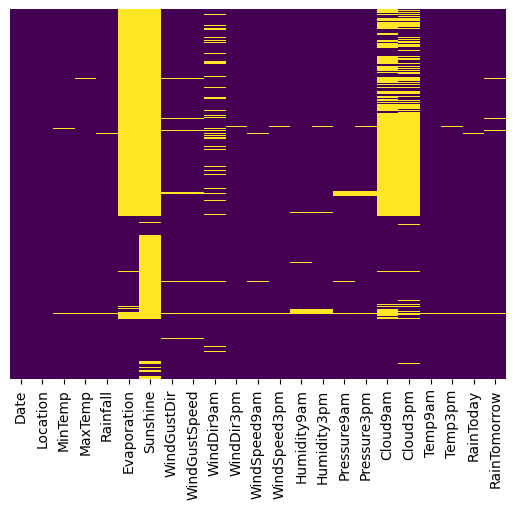

In [7]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

**Mengecek Outlier**

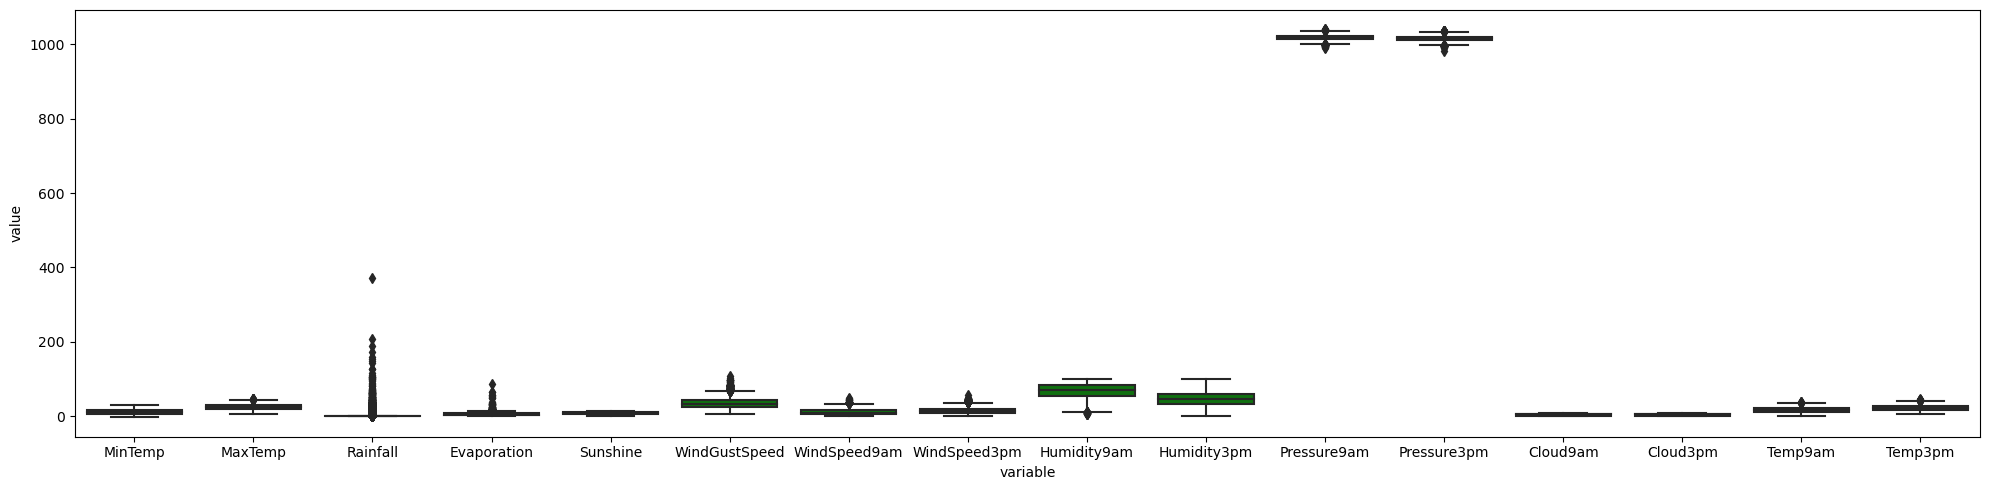

In [8]:
df1 = df.select_dtypes(include=['float64', 'int64'])

fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x="variable",
            y="value",
            color='green',
            orient='v',
            data=pd.melt(df1),
            ax=ax)
plt.tight_layout()

# Data Cleaning

## Drop Column

In [9]:
# Menghapus beberapa kolom yang tidak diperlukan
df = df.drop(columns = ['Date', 'Location'])
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Mengatasi Missing Value

In [10]:
# Copy dataset ke variabel df_clean
df_clean = df.copy()
df_clean.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Mengisi missing value Numeric dengan median

In [11]:
# Mengisi kolom bertipe number yang NaN dengan median
numeric_column = df_clean.select_dtypes(include=['number']).columns
for column in numeric_column:
    df_clean[column] = SimpleImputer(
        strategy='median').fit_transform(df_clean[[column]])

In [12]:
# Mengecek kembali missing value
df_clean.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir       187
WindGustSpeed       0
WindDir9am       1025
WindDir3pm        154
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         136
RainTomorrow      136
dtype: int64

Saya memutuskan untuk menggantikan nilai NaN pada kolom bertipe numerik dengan menggunakan nilai Median. Keputusan ini didasarkan pada stabilitas Median yang lebih baik daripada Mean serta kemampuannya untuk menjaga integritas data. Mengingat proyek ini berfokus pada prediksi cuaca, langkah ini diambil untuk menjaga konsistensi dan meraih hasil yang lebih baik.

### Mengisi missing value Object dengan modus

In [13]:
# Mengisi kolom bertipe object yang NaN dengan modus
object_column = df_clean.select_dtypes(include=['object']).columns
for col in object_column:
    mode_val = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_val, inplace=True)

In [14]:
# Mengecek kembali missing value
df_clean.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Saya memutuskan untuk menggantikan nilai NaN pada kolom bertipe objek menggunakan nilai Modus karena Modus mencerminkan nilai yang paling sering muncul dalam dataset dan lebih sesuai untuk kolom kategorikal. Mengingat proyek ini berfokus pada prediksi cuaca, mengisi nilai NaN dengan Modus memungkinkan saya untuk mempertahankan informasi yang paling umum atau sering muncul dalam kolom, menjaga konsistensi data, dan mengurangi potensi gangguan pada analisis. Keputusan ini diambil untuk memastikan data tetap informatif dan tidak terpengaruh oleh nilai yang hilang

# Exploratory Data Analysis

## Data Query and Grouping

In [15]:
# Melihat distribusi data target
df_clean['RainTomorrow'].value_counts()

No     8693
Yes    2118
Name: RainTomorrow, dtype: int64

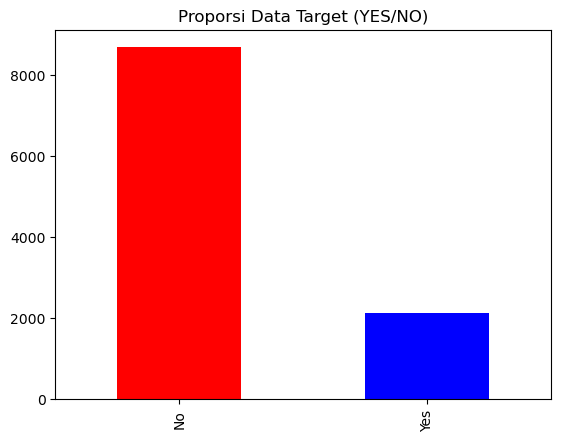

In [16]:
# Membuat diagram pie
proporsi = df_clean['RainTomorrow'].value_counts()
proporsi.plot(kind='bar', color=['red', 'blue'])
plt.title('Proporsi Data Target (YES/NO)')
plt.show()

In [17]:
# Data Grouping: Menghitung rata-rata MaxTemp berdasarkan WindGustDir
avg_max_temp_by_wind_dir = df_clean.groupby('WindGustDir')['MaxTemp'].mean().reset_index()
print(avg_max_temp_by_wind_dir)

   WindGustDir    MaxTemp
0            E  25.960739
1          ENE  26.054410
2          ESE  24.462500
3            N  24.822901
4           NE  25.923907
5          NNE  25.566057
6          NNW  25.483065
7           NW  25.056738
8            S  23.928662
9           SE  23.705467
10         SSE  23.474464
11         SSW  23.503805
12          SW  22.726080
13           W  22.242093
14         WNW  22.752478
15         WSW  22.640680


In [18]:
# Data Grouping: Menghitung rata-rata MinTemp berdasarkan WindGustDir
avg_min_temp_by_wind_dir = df_clean.groupby('WindGustDir')['MinTemp'].mean().reset_index()
print(avg_min_temp_by_wind_dir)

   WindGustDir    MinTemp
0            E  12.941176
1          ENE  13.374290
2          ESE  11.679228
3            N  11.589122
4           NE  13.490671
5          NNE  13.224935
6          NNW  11.912366
7           NW  11.515839
8            S  13.289968
9           SE  11.409347
10         SSE  11.652047
11         SSW  12.571233
12          SW  10.900393
13           W   9.674651
14         WNW  10.252187
15         WSW  10.109868


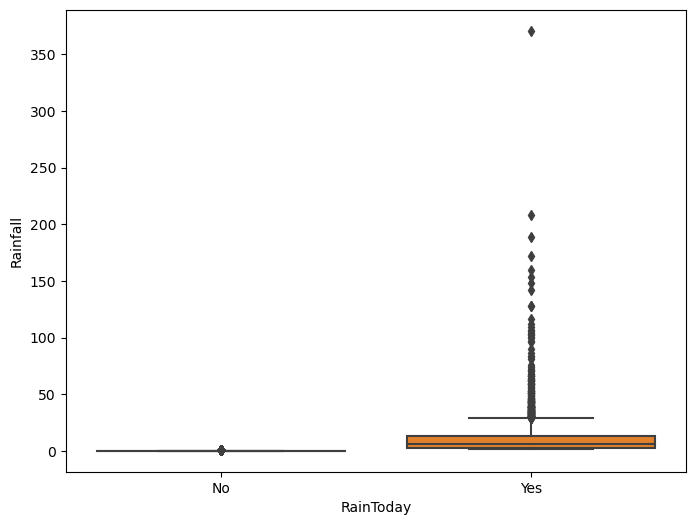

In [19]:
# Data Grouping: Menampilkan distribusi curah hujan (Rainfall) berdasarkan RainToday
plt.figure(figsize=(8, 6))
sns.boxplot(x='RainToday', y='Rainfall', data=df_clean)
plt.xlabel('RainToday')
plt.ylabel('Rainfall')
plt.show()

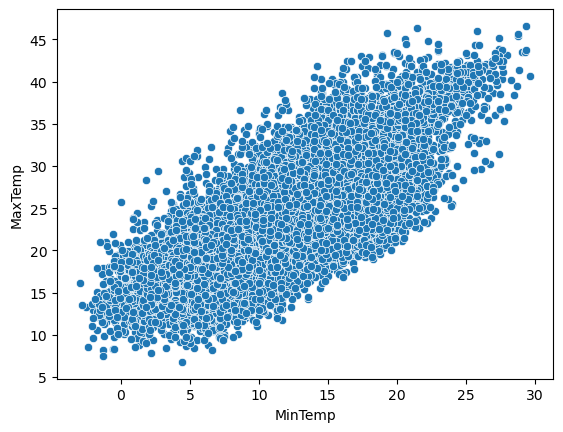

In [20]:
# Menampilkan hubungan antara MaxTemp dan MinTemp
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df_clean)
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

## Mencari Central Tendency dan Variability

**Central Tendency**

In [21]:
central_tendency = df_clean.describe().T
central_tendency.reset_index().rename(
    columns={'index': 'Column'})

,Column,count,mean,std,min,25%,50%,75%,max
0,MinTemp,10811.0,11.749394,6.231374,-3.0,6.8,11.7,16.70,29.7
1,MaxTemp,10811.0,24.089927,6.962168,6.8,18.7,23.6,28.80,46.6
2,Rainfall,10811.0,2.327213,9.536179,0.0,0.0,0.0,0.25,371.0
3,Evaporation,10811.0,4.895264,3.069702,0.0,4.4,4.4,4.40,86.2
4,Sunshine,10811.0,8.680862,1.688474,0.0,8.9,8.9,8.90,13.8
5,WindGustSpeed,10811.0,35.205624,12.479793,7.0,28.0,33.0,43.00,107.0
6,WindSpeed9am,10811.0,11.141985,7.505083,0.0,6.0,9.0,17.00,48.0
7,WindSpeed3pm,10811.0,15.597170,7.732691,0.0,9.0,15.0,20.00,56.0
8,Humidity9am,10811.0,68.611137,19.990741,5.0,55.0,70.0,84.00,100.0
9,Humidity3pm,10811.0,47.270650,20.808172,1.0,32.0,46.0,61.00,100.0


### Variability

In [22]:
# Ranges
range = df_clean.describe().loc[['min', 'max']].T
range.rename(columns={'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

# Variance
variance = df_clean.select_dtypes(
    include=[np.number]).var(ddof=1).to_frame()
variance.rename(columns={0: 'Variance'}, inplace=True)

# Standard Deviation
std_deviation = df_clean.select_dtypes(
    include=[np.number]).std(ddof=1).to_frame()
std_deviation.rename(columns={0: 'Standard Deviation'}, inplace=True)

# Quartil and IQR
quartil = df_clean.select_dtypes(
    include=[np.number]).quantile([0.25, 0.50, 0.75])
quartil.index = ['Q1', 'Q2', 'Q3']
quartil = quartil.T
quartil['IQR'] = quartil['Q3'] - quartil['Q1']

# Coefficient of Variation
def coefficient_of_variation(column):
    return (np.std(column, ddof=1) / np.mean(column)) * 100
coef_variation = df_clean.select_dtypes(
    include=[np.number]).apply(coefficient_of_variation)
coef_variation = pd.DataFrame({'Coefficient of Variation': coef_variation})

In [23]:
# Menggabungkan semua hasil
variability = pd.concat([range,
                         variance,
                         std_deviation,
                         quartil,
                         coef_variation], axis=1)

variability.reset_index().rename(columns={'index': 'Column'})

,Column,Minimum,Maximum,Variance,Standard Deviation,Q1,Q2,Q3,IQR,Coefficient of Variation
0,MinTemp,-3.0,29.7,38.830024,6.231374,6.8,11.7,16.70,9.90,53.035707
1,MaxTemp,6.8,46.6,48.471779,6.962168,18.7,23.6,28.80,10.10,28.900742
2,Rainfall,0.0,371.0,90.938706,9.536179,0.0,0.0,0.25,0.25,409.768195
3,Evaporation,0.0,86.2,9.423071,3.069702,4.4,4.4,4.40,0.00,62.707589
4,Sunshine,0.0,13.8,2.850945,1.688474,8.9,8.9,8.90,0.00,19.450534
5,WindGustSpeed,7.0,107.0,155.745226,12.479793,28.0,33.0,43.00,15.00,35.448293
6,WindSpeed9am,0.0,48.0,56.326277,7.505083,6.0,9.0,17.00,11.00,67.358585
7,WindSpeed3pm,0.0,56.0,59.794512,7.732691,9.0,15.0,20.00,11.00,49.577528
8,Humidity9am,5.0,100.0,399.629715,19.990741,55.0,70.0,84.00,29.00,29.136291
9,Humidity3pm,1.0,100.0,432.980026,20.808172,32.0,46.0,61.00,29.00,44.019221


**Deskripsi:**
1. Curah Hujan (Rainfall):

  * Rata-rata curah hujan adalah sekitar 2.31 mm, dengan rentang dari 0.0 mm hingga 371.0 mm.
  * Distribusi curah hujan memiliki nilai minimum yang relatif tinggi (0.0 mm) dan nilai maksimum yang cukup bervariasi (371.0 mm), menunjukkan adanya beberapa periode hujan yang sangat deras.

2. Suhu dan Kelembaban:

  * Kelembaban pada pukul 9 pagi (Humidity9am) memiliki rata-rata sekitar 68.9%, dengan rentang dari 0.0% hingga 100.0%.
  * Kelembaban pada pukul 3 sore (Humidity3pm) memiliki rata-rata sekitar 51.6%, dengan rentang dari 0.0% hingga 100.0%.
  * Distribusi suhu dan kelembaban menunjukkan variasi yang signifikan, dengan nilai minimum dan maksimum yang mencakup rentang yang luas

3. Angin:

  * Kecepatan angin pada pukul 9 pagi (WindSpeed9am) memiliki rata-rata sekitar 14 km/jam, dengan rentang dari 0 km/jam hingga 130 km/jam.
  * Kecepatan angin pada pukul 3 sore (WindSpeed3pm) memiliki rata-rata sekitar 18.7 km/jam, dengan rentang dari 0 km/jam hingga 87 km/jam.
  * Distribusi kecepatan angin menunjukkan variasi yang cukup besar, dengan nilai maksimum yang cukup tinggi.

4. Tekanan Atmosfer:

  * Tekanan atmosfer pada pukul 9 pagi (Pressure9am) memiliki rata-rata sekitar 1017.6 hPa, dengan rentang dari 980.5 hPa hingga 1041.0 hPa.
  * Tekanan atmosfer pada pukul 3 sore (Pressure3pm) memiliki rata-rata sekitar 1015.3 hPa, dengan rentang dari 977.1 hPa hingga 1039.6 hPa.
  * Distribusi tekanan atmosfer menunjukkan variasi yang cukup terbatas.

5. Keberawan (Cloudiness):

   * Keberawan pada pukul 9 pagi (Cloud9am) memiliki rata-rata sekitar 4.66, dengan rentang dari 0 hingga 9.
   * Keberaban pada pukul 3 sore (Cloud3pm) memiliki rata-rata sekitar 4.71, dengan rentang dari 0 hingga 9.
   * Distribusi keberawanan menunjukkan variasi yang moderat.

6. Sinar Matahari (Sunshine):

   * Jumlah jam sinar matahari memiliki rata-rata sekitar 7.99 jam, dengan rentang dari 0.0 jam hingga 14.5 jam.
   * Distribusi jam sinar matahari menunjukkan variasi yang cukup besar.

7. Tekanan Atmosfer dan Temperatur:

   * Tekanan atmosfer pada pukul 9 pagi dan 3 sore menunjukkan distribusi yang cukup stabil dan tidak terlalu bervariasi.

8. Evaporasi:

   * Tingkat evaporasi memiliki rata-rata sekitar 5.18 mm, dengan rentang dari 0.0 mm hingga 145.0 mm.
   * Distribusi tingkat evaporasi menunjukkan variasi yang cukup besar.

##         Korelasi Data

<Axes: >

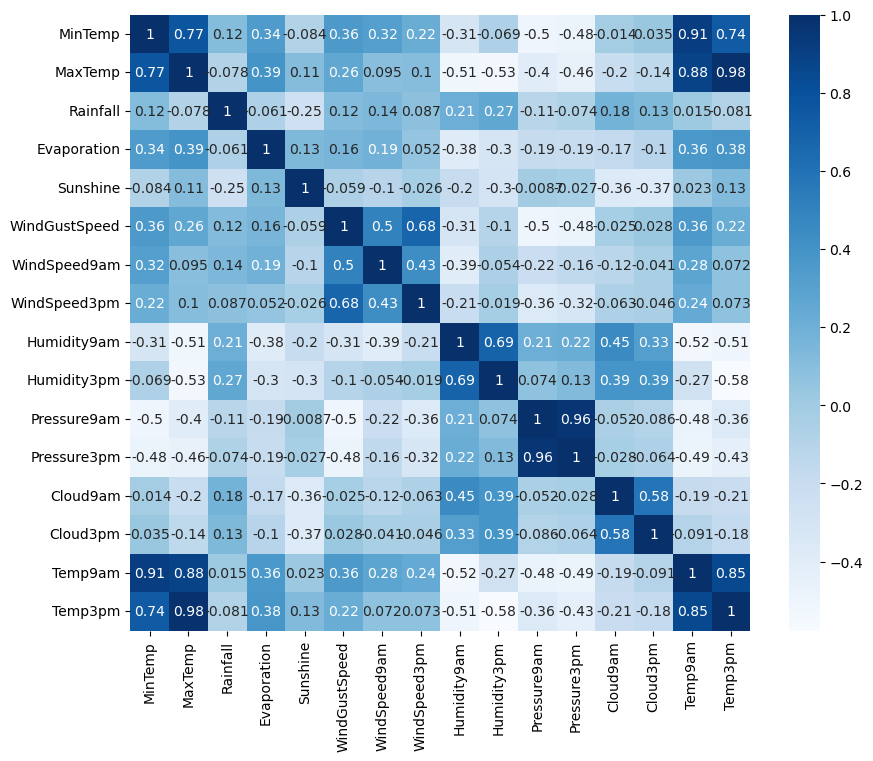

In [24]:
k = len(df_clean.columns)
cm = df_clean.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap = 'Blues')

Korelasi data mengukur sejauh mana hubungan antara dua variabel, dengan nilai berkisar antara -1 dan 1. Nilai positif menunjukkan hubungan positif, sedangkan nilai negatif menunjukkan hubungan negatif. Korelasi tidak menunjukkan sebab-akibat, hanya menggambarkan sejauh mana perubahan dalam satu variabel berkaitan dengan perubahan dalam variabel lainnya. Penggunaannya berguna untuk memahami hubungan variabel sebelum analisis lebih lanjut.

## Distribusi Data

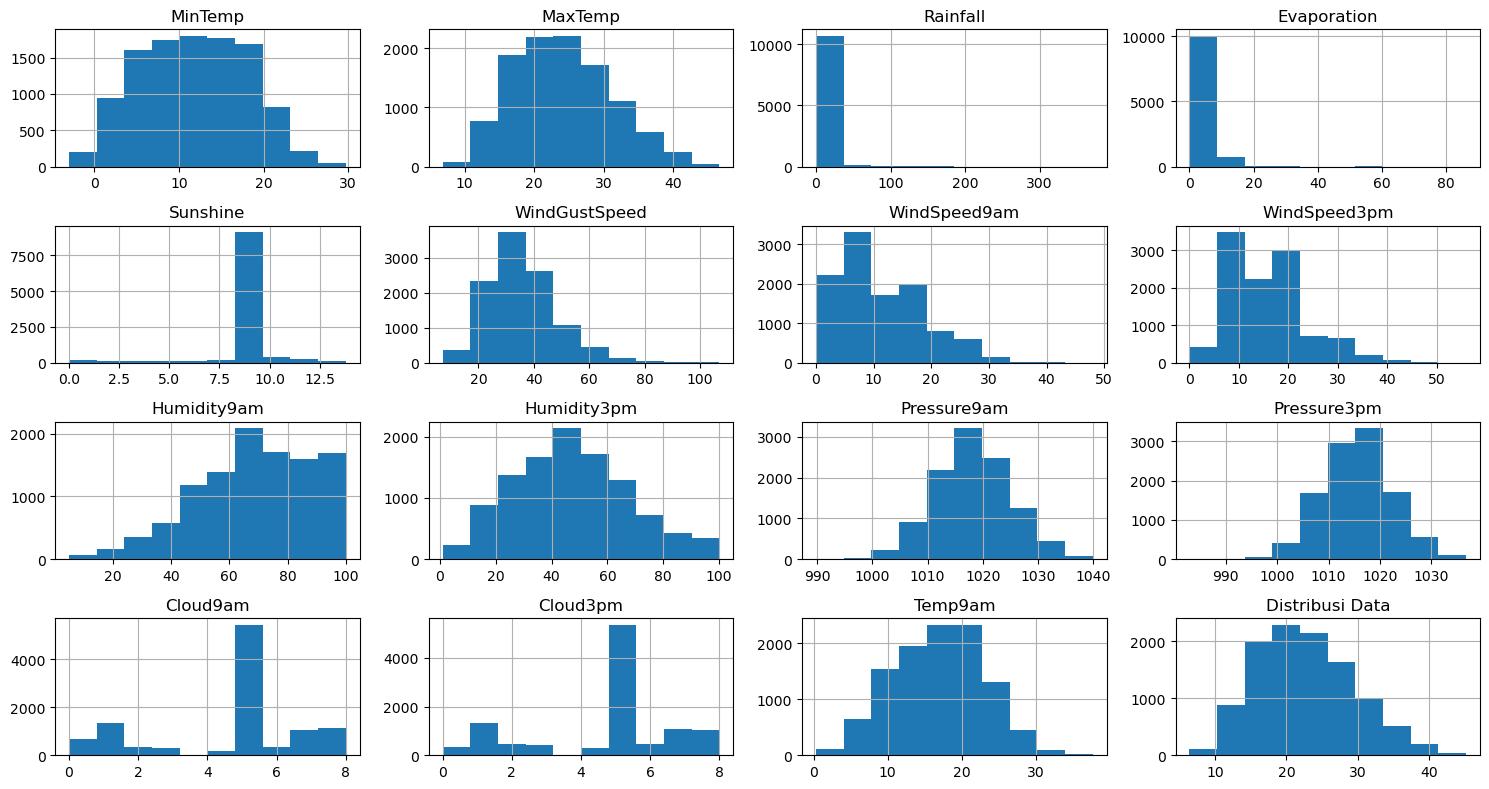

In [25]:
# Histogram
df_clean.hist(figsize=(15, 8))
plt.title('Distribusi Data')
plt.tight_layout()
plt.show()

Histogram di atas mencerminkan sebaran data dari setiap kolom numerik dari dataset yang telah dibersihkan. Histogram tersebut memberikan pandangan tentang seberapa merata data tersebar dalam kisaran nilai tertentu. Hal itu juga berguna untuk melihat apakah variabel-variabel pada dataset berdistribusi normal. Jika dilihat dari histogram diatas, variabel-variabel Sunshine, Humidity9am, Pressure9am, Pressure3pm, Cloud9am, dan Cloud3pm cenderung memiliki skewnes negatif sedangkan sisanya cenderung positif.

# Data Preprocessing

## Mengatasi Outlier Data

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

In [26]:
#Menghitung Skor IQR
sorted(df_clean)
Q1=df_clean.quantile(0.25)
Q3=df_clean.quantile(0.75)
IQR=Q3-Q1
print(IQR)

MinTemp           9.90
MaxTemp          10.10
Rainfall          0.25
Evaporation       0.00
Sunshine          0.00
WindGustSpeed    15.00
WindSpeed9am     11.00
WindSpeed3pm     11.00
Humidity9am      29.00
Humidity3pm      29.00
Pressure9am       9.10
Pressure3pm       9.00
Cloud9am          1.00
Cloud3pm          1.00
Temp9am           8.90
Temp3pm           9.60
dtype: float64


In [27]:
# Menghapus outlier
df_clear = df_clean[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,7.4,25.1,0.0,4.4,8.9,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
3,9.2,28.0,0.0,4.4,8.9,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
5,14.6,29.7,0.2,4.4,8.9,WNW,56.0,W,W,19.0,...,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,No,No
7,7.7,26.7,0.0,4.4,8.9,W,35.0,SSE,W,6.0,...,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,No,No
10,13.4,30.4,0.0,4.4,8.9,N,30.0,SSE,ESE,17.0,...,48.0,22.0,1011.8,1008.7,5.0,5.0,20.4,28.8,No,Yes


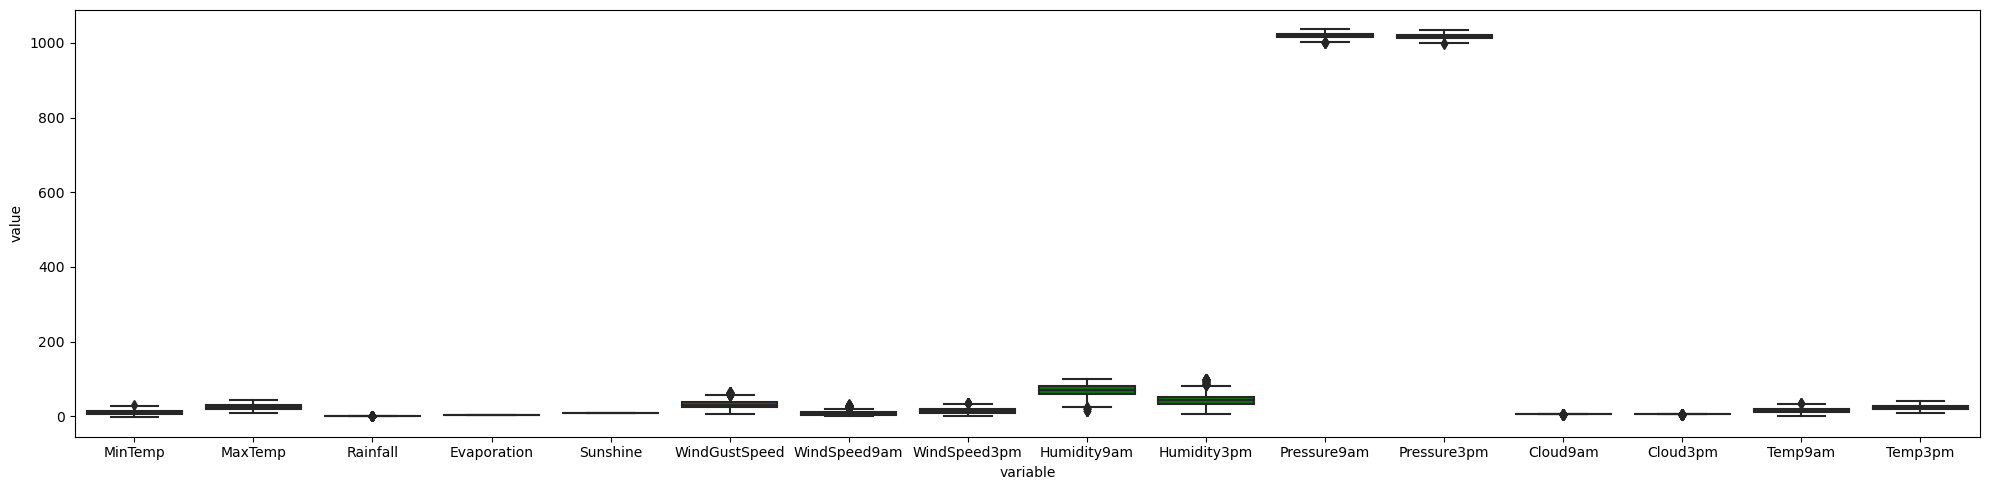

In [28]:
# Mengecek kembali outlier
df_number = df_clear.select_dtypes(include=['float64', 'int64'])
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x="variable",
            y="value",
            color='green',
            orient='v',
            data=pd.melt(df_number),
            ax=ax)
plt.tight_layout()

Boxplot di atas digunakan untuk memvisualisasikan setiap kolom numerik, hal ini untuk mengamati perbedaan dalam distribusi data sebelum dan sesudah menangani data outlier. Dengan menggunakan teknik IQR tersebut dapat dilihat bahwa data outlier telah dihapus. Tindakan ini dapat membantu membersihkan data sebelum melanjutkan analisis lebih lanjut. Dengan menghilangkan data outlier, kemungkinan besar analisis data yang dilakukan akan lebih akurat.

## Encoding Data

Encoding data adalah proses mengonversi data dari suatu bentuk atau format ke bentuk atau format lain. Tujuannya yaitu agar format yang telah dikonversi tersebut dapat dimengerti oleh algoritma machine learning atau model statistik.

In [29]:
# Mengubah tipe data object menjadi category
df_clear["WindGustDir"] = df_clear["WindGustDir"].astype('category')
df_clear["WindDir9am"] = df_clear["WindDir9am"].astype('category')
df_clear["WindDir3pm"] = df_clear["WindDir3pm"].astype('category')
df_clear["RainToday"] = df_clear["RainToday"].astype('category')
df_clear["RainTomorrow"] = df_clear["RainTomorrow"].astype('category')
df_clear.dtypes

MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday        category
RainTomorrow     category
dtype: object

In [30]:
df_clear["WindGustDir"] = df_clear["WindGustDir"].cat.codes
df_clear["WindDir9am"] = df_clear["WindDir9am"].cat.codes
df_clear["WindDir3pm"] = df_clear["WindDir3pm"].cat.codes
df_clear["RainToday"] = df_clear["RainToday"].cat.codes
df_clear["RainTomorrow"] = df_clear["RainTomorrow"].cat.codes
df_clear.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,7.4,25.1,0.0,4.4,8.9,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
3,9.2,28.0,0.0,4.4,8.9,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
5,14.6,29.7,0.2,4.4,8.9,14,56.0,13,13,19.0,...,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,0
7,7.7,26.7,0.0,4.4,8.9,13,35.0,10,13,6.0,...,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,0
10,13.4,30.4,0.0,4.4,8.9,3,30.0,10,2,17.0,...,48.0,22.0,1011.8,1008.7,5.0,5.0,20.4,28.8,0,1


In [31]:
df_clear.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir         int8
WindGustSpeed    float64
WindDir9am          int8
WindDir3pm          int8
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday           int8
RainTomorrow        int8
dtype: object

## Normalisasi Data

Normalisasi data adalah proses mengubah nilai-nilai dalam dataset sehingga memiliki skala yang seragam atau relatif sebanding. Tujuan normalisasi data melibatkan beberapa aspek yang dapat memberikan keuntungan dalam analisis data dan pengembangan model seperti menghindari perbedaan skala, mengurangi pengaruh outlier, dan meningkatkan stabilitas model

In [32]:
#Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)
df_norm.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.321981,0.454006,0.000000,0.0,0.0,0.933333,0.637931,0.400000,1.000000,0.121212,...,0.348837,0.210526,0.291667,0.280453,0.666667,0.666667,0.474164,0.469136,0.0,0.0
1,0.377709,0.540059,0.000000,0.0,0.0,0.266667,0.293103,0.600000,0.000000,0.333333,...,0.360465,0.115789,0.486111,0.422096,0.666667,0.666667,0.501520,0.537037,0.0,0.0
2,0.544892,0.590504,0.333333,0.0,0.0,0.933333,0.844828,0.866667,0.866667,0.575758,...,0.476744,0.189474,0.252778,0.212465,0.666667,0.666667,0.577508,0.611111,0.0,0.0
3,0.331269,0.501484,0.000000,0.0,0.0,0.866667,0.482759,0.666667,0.866667,0.181818,...,0.395349,0.147368,0.369444,0.345609,0.666667,0.666667,0.446809,0.506173,0.0,0.0
4,0.507740,0.611276,0.000000,0.0,0.0,0.200000,0.396552,0.666667,0.133333,0.515152,...,0.395349,0.178947,0.325000,0.305949,0.666667,0.666667,0.571429,0.608025,0.0,1.0


## Split Dataset

In [33]:
# memisahkan 100 dataset untuk melakukan Inferensi nantinya
data_test = df_clear.iloc[-100:]
df_clear = df_clear.iloc[:-100]

In [34]:
# Memilih Variable Target & Variabel Independent
X = df_clear.drop(columns=['RainTomorrow'])
y = df_clear['RainTomorrow']

In [35]:
# Split data dengan perbandingan 80% train dan 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Jumlah Data Training', len(X_train))
print('Jumlah Data Testing', len(X_test))

Jumlah Data Training 2937
Jumlah Data Testing 735


# Pendefinisian Model

**Logistic Regression**

**Logistic Regression** adalah model statistik yang digunakan untuk memodelkan probabilitas kejadian sukses atau kegagalan suatu peristiwa biner. Meskipun namanya mencakup "regression," logistic regression sebenarnya digunakan untuk tugas klasifikasi, khususnya klasifikasi biner, di mana output yang dihasilkan adalah probabilitas dari sukses dalam satu dari dua kategori.

In [36]:
# Mendefinisikan model Logistic Regression
logreg = LogisticRegression()

**Support Vector Machine**

**Support Vector Machine (SVM)** adalah suatu algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. SVM bekerja dengan cara menemukan batas keputusan optimal yang memisahkan dua kelas dalam ruang fitur dengan sejelas mungkin. Pemisahan ini dilakukan dengan memanfaatkan vektor dukungan, yaitu subset dari data pelatihan yang terletak paling dekat dengan batas keputusan. SVM juga dikenal sebagai Classifier dengan Margen Maksimum karena mencari batas keputusan yang memiliki jarak maksimum antara vektor dukungan.

In [37]:
# Mendefinisikan model SVM
svm = SVC(kernel='linear', C=1.0)

# Training Model

**Logistic Regression**

In [38]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred_logreg = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Akurasi: {accuracy*100:.2f}%")

Akurasi: 91.43%


**Support Vector Machine**

In [40]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [41]:
y_pred_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi: {accuracy*100:.2f}%")

Akurasi: 91.43%


# Evaluasi Model

**Evaluasi Model Logistic Regression**

In [42]:
report_logreg = classification_report(y_test, y_pred_logreg)
print(report_logreg)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       656
           1       0.81      0.27      0.40        79

    accuracy                           0.91       735
   macro avg       0.86      0.63      0.68       735
weighted avg       0.91      0.91      0.89       735



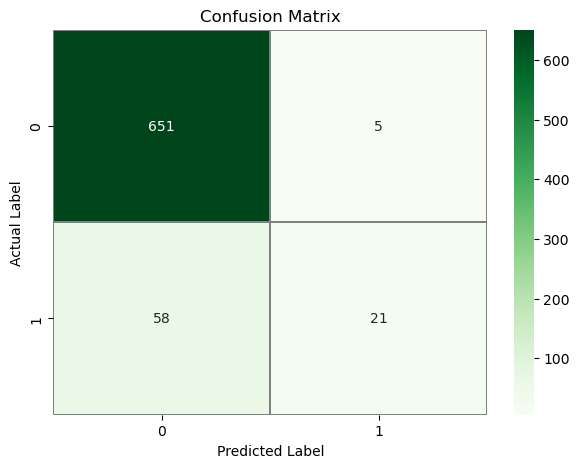

In [43]:
# confusion matrix
y_pred_logreg = logreg.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred_logreg)

f,ax = plt.subplots(figsize = (7, 5))
sns.heatmap(confusion_mtx,
            annot = True,
            linewidths = 0.01,
            cmap="Greens",
            linecolor = "gray",
            fmt = '.0f',
            ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

**Evaluasi Model SVM**

In [44]:
report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       656
           1       0.90      0.23      0.36        79

    accuracy                           0.91       735
   macro avg       0.91      0.61      0.66       735
weighted avg       0.91      0.91      0.89       735



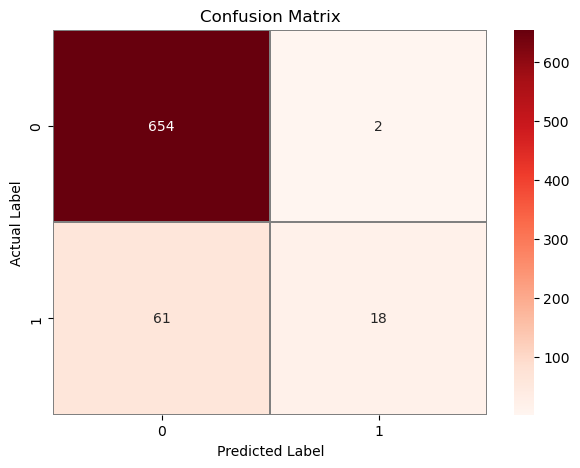

In [45]:
# confusion matrix
y_pred_svm = svm.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred_svm)

f,ax = plt.subplots(figsize = (7, 5))
sns.heatmap(confusion_mtx,
            annot = True,
            linewidths = 0.01,
            cmap="Reds",
            linecolor = "gray",
            fmt = '.0f',
            ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# Model Inference

In [46]:
# Melakukan Inferensi Model dengan 100 dataset yang sudah disiapkan
data_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8905,11.7,23.6,0.0,4.4,8.9,12,33.0,12,5,9.0,...,70.0,46.0,1018.2,1015.5,5.0,5.0,17.2,22.1,0,0
8906,11.7,23.6,0.0,4.4,8.9,12,33.0,12,8,9.0,...,70.0,30.0,1018.2,1011.2,5.0,5.0,17.2,34.7,0,0
8908,20.2,37.4,0.0,4.4,8.9,2,28.0,2,8,13.0,...,54.0,15.0,1012.9,1010.6,5.0,5.0,25.6,36.3,0,0
8909,24.4,41.0,0.0,4.4,8.9,12,33.0,5,7,20.0,...,47.0,18.0,1012.8,1009.7,5.0,5.0,30.0,39.7,0,0
8914,23.3,33.1,0.0,4.4,8.9,8,31.0,10,8,19.0,...,31.0,19.0,1013.3,1011.7,5.0,5.0,26.2,32.3,0,0


In [47]:
X_new = data_test.drop(['RainTomorrow'],axis=1)
y_new  = data_test['RainTomorrow']

X_new

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
8905,11.7,23.6,0.0,4.4,8.9,12,33.0,12,5,9.0,15.0,70.0,46.0,1018.2,1015.5,5.0,5.0,17.2,22.1,0
8906,11.7,23.6,0.0,4.4,8.9,12,33.0,12,8,9.0,19.0,70.0,30.0,1018.2,1011.2,5.0,5.0,17.2,34.7,0
8908,20.2,37.4,0.0,4.4,8.9,2,28.0,2,8,13.0,7.0,54.0,15.0,1012.9,1010.6,5.0,5.0,25.6,36.3,0
8909,24.4,41.0,0.0,4.4,8.9,12,33.0,5,7,20.0,11.0,47.0,18.0,1012.8,1009.7,5.0,5.0,30.0,39.7,0
8914,23.3,33.1,0.0,4.4,8.9,8,31.0,10,8,19.0,13.0,31.0,19.0,1013.3,1011.7,5.0,5.0,26.2,32.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10587,15.5,23.3,0.0,4.4,8.9,7,20.0,6,9,2.0,9.0,79.0,61.0,1023.4,1020.7,5.0,5.0,18.0,23.0,0
10616,6.2,20.4,0.0,4.4,8.9,1,24.0,5,4,6.0,15.0,58.0,45.0,1021.7,1019.1,5.0,5.0,16.0,19.6,0
10755,17.8,25.5,0.0,4.4,8.9,4,48.0,5,4,20.0,31.0,64.0,72.0,1012.4,1010.0,3.0,5.0,23.9,23.0,0
10766,14.4,23.9,0.0,4.4,8.9,12,30.0,12,9,19.0,19.0,52.0,51.0,1017.9,1015.2,5.0,5.0,22.0,22.9,0


### Fitting Model

**Logistic Regression**

In [48]:
y_pred_logreg_new = logreg.predict(X_new)
accuracy = accuracy_score(y_new, y_pred_logreg_new)
print(f"Akurasi: {accuracy*100:.2f}%")

Akurasi: 96.00%


**Support Vector Machine**

In [49]:
y_pred_svm_new = svm.predict(X_new)
accuracy = accuracy_score(y_new, y_pred_svm_new)
print(f"Akurasi: {accuracy*100:.2f}%")

Akurasi: 96.00%


**Evaluasi Logistic Regression**

In [50]:
new_report_logreg = classification_report(y_new, y_pred_logreg_new)
print(new_report_logreg)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        95
           1       1.00      0.20      0.33         5

    accuracy                           0.96       100
   macro avg       0.98      0.60      0.66       100
weighted avg       0.96      0.96      0.95       100



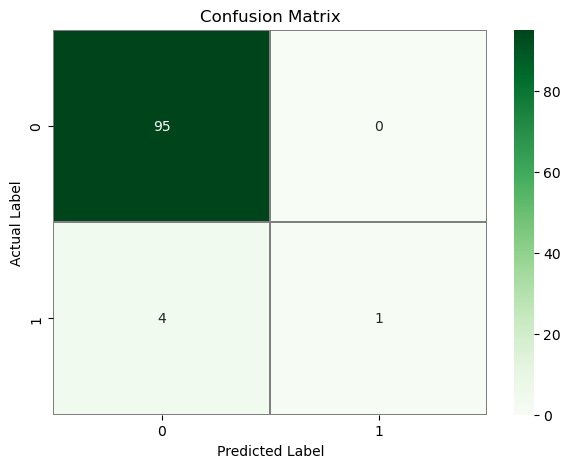

In [51]:
# confusion matrix
y_pred_logreg_new = logreg.predict(X_new)
confusion_mtx = confusion_matrix(y_new, y_pred_logreg_new)

f,ax = plt.subplots(figsize = (7, 5))
sns.heatmap(confusion_mtx,
            annot = True,
            linewidths = 0.01,
            cmap="Greens",
            linecolor = "gray",
            fmt = '.0f',
            ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

**Evaluasi SVM**

In [52]:
new_report_svm = classification_report(y_new, y_pred_svm_new)
print(new_report_svm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        95
           1       1.00      0.20      0.33         5

    accuracy                           0.96       100
   macro avg       0.98      0.60      0.66       100
weighted avg       0.96      0.96      0.95       100



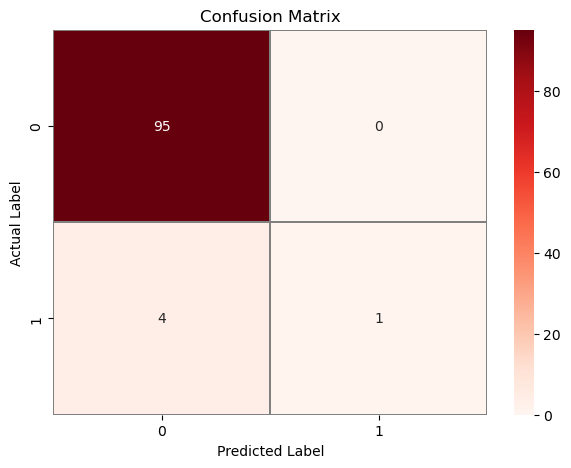

In [53]:
# confusion matrix
y_pred_svm_new = svm.predict(X_new)
confusion_mtx = confusion_matrix(y_new, y_pred_svm_new)

f,ax = plt.subplots(figsize = (7, 5))
sns.heatmap(confusion_mtx,
            annot = True,
            linewidths = 0.01,
            cmap="Reds",
            linecolor = "gray",
            fmt = '.0f',
            ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# Kesimpulan

Proyek ini bertujuan untuk mengembangkan model prediksi cuaca berdasarkan dataset "WeatherAUS" menggunakan dua metode klasifikasi, yaitu logistic regression dan support vector machine (SVM). Setelah melakukan pengolahan data dan analisis, berikut adalah kesimpulan yang diperoleh:


*   Model logistic regression dan SVM memberikan hasil yang baik dalam memprediksi cuaca, dengan akurasi tinggi pada dataset pengujian.
*   Model Logistic Regression mendapatkan akurasi sebesar 86.24% dan model Support Vector Machine sebesar 86.14%.
*   Model Logistic Regression lebih efektif dan efisien dibandingkan model SVM karena proses training data yang relatif singkat jika dibandingkan dengan model SVM yang membutuhkan waktu yang lebih lama.
*   Meskipun perbedaan nya tidak terlalu signifikan tetapi model Logistic Regression menunjukan hasil yang lebih baik dibandingkan SVM.
*   Melakukan evaluasi dengan menggunakan berbagai metrik seperti akurasi, presisi, recall, dan F1-score memberikan pemahaman yang holistik tentang performa model.
*   Confusion matrix membantu dalam mengidentifikasi kekuatan dan kelemahan dari masing-masing model.
*   Jika dilihat dari evaluasi data model cenderung memprediksi data pada kelas 0, hal ini disebabkan oleh distribusi data target yang tidak seimbang.
*   Dalam Inferensi Model juga mencerminkan hal yang sama seperti evaluasi model awal.


Proyek ini dapat memberikan pemahaman tentang cara data cuaca dari berbagai wilayah di Australia dapat dioptimalkan menggunakan model machine learning seperti regresi linear dan SVM. Hal ini juga dapat dimanfaatkan untuk meningkatkan manajemen layanan dan mendukung pengambilan keputusan yang lebih efektif. Dengan pemahaman yang lebih baik ini, kita dapat menggunakan informasi yang berharga dalam berbagai situasi, termasuk perencanaan aktivitas luar ruangan, pertanian, dan manajemen sumber daya alam.

